# 2.5 Visual Weather Systems CNN

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.utils import to_categorical

In [8]:
path = os.getcwd()
path

'/Users/kirstencurrie/ClimateWins Analysis/02 Scripts'

In [22]:
path = '/Users/kirstencurrie/ClimateWins Analysis/03 Images/' #your path here
folders = [f for f in os.listdir(path) if not f.startswith('.') and os.path.isdir(os.path.join(path, f))]
print(folders)


['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [30]:
# First, get the list of valid class folders
valid_classes = [f for f in os.listdir(path) if not f.startswith('.') and os.path.isdir(os.path.join(path, f))]

In [84]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250, 250),
    batch_size=32,
    classes=valid_classes,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250, 250),
    batch_size=32,
    classes=valid_classes,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [86]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [156]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 19, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/19
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 318ms/step - accuracy: 0.9557 - loss: 0.0166 - val_accuracy: 0.8705 - val_loss: 0.0590
Epoch 2/19
 1/28 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 1.0000 - loss: 4.3156e-06

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 1.0000 - loss: 4.3156e-06 - val_accuracy: 0.8661 - val_loss: 0.0603
Epoch 3/19
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 294ms/step - accuracy: 0.9915 - loss: 0.0042 - val_accuracy: 0.8705 - val_loss: 0.0625
Epoch 4/19
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9688 - loss: 0.0075 - val_accuracy: 0.8527 - val_loss: 0.0650
Epoch 5/19
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 296ms/step - accuracy: 0.9833 - loss: 0.0064 - val_accuracy: 0.8527 - val_loss: 0.0614
Epoch 6/19
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 1.0000 - loss: 1.2982e-07 - val_accuracy: 0.8393 - val_loss: 0.0625
Epoch 7/19
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 294ms/step - accuracy: 0.9872 - loss: 0.0049 - val_accuracy: 0.8795 - val_loss: 0.0570
Epoch 8/19
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 1.0000 - loss: 5.3487e-04 - val_accuracy: 0.8705 - val_loss: 0.0591
Epoch 9/19
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 305ms/step - accuracy: 0.9746 - loss: 0.0109 - val_accuracy: 0.647

In [158]:
results = pd.DataFrame(model.history.history)

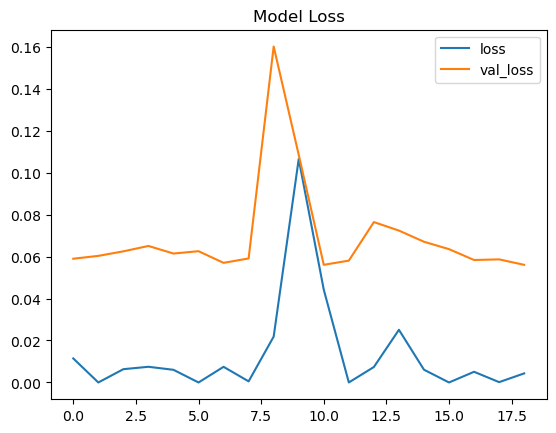

In [160]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

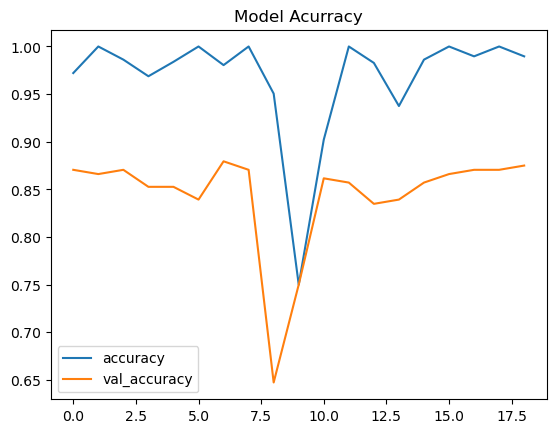

In [162]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [164]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9896432757377625, Val_Accuracy: 0.875
Loss: 0.004327431321144104, Val_Loss: 0.05604328587651253


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


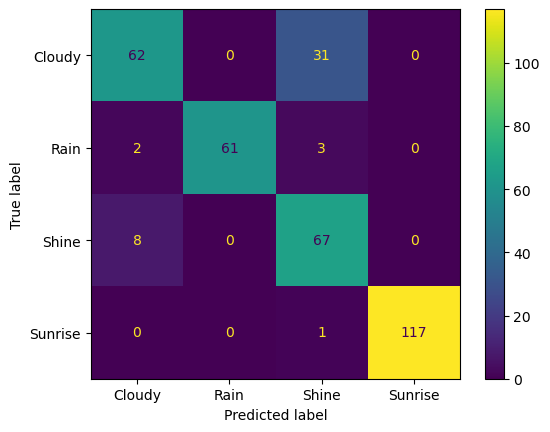

In [172]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.show()

In [174]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


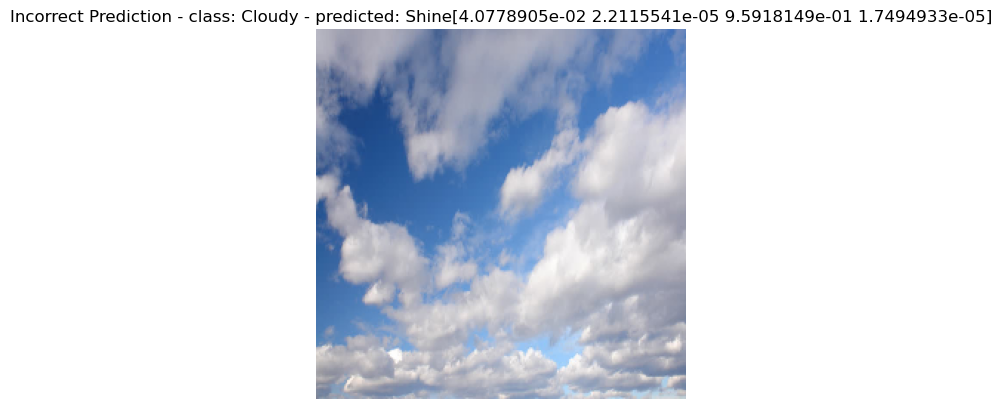

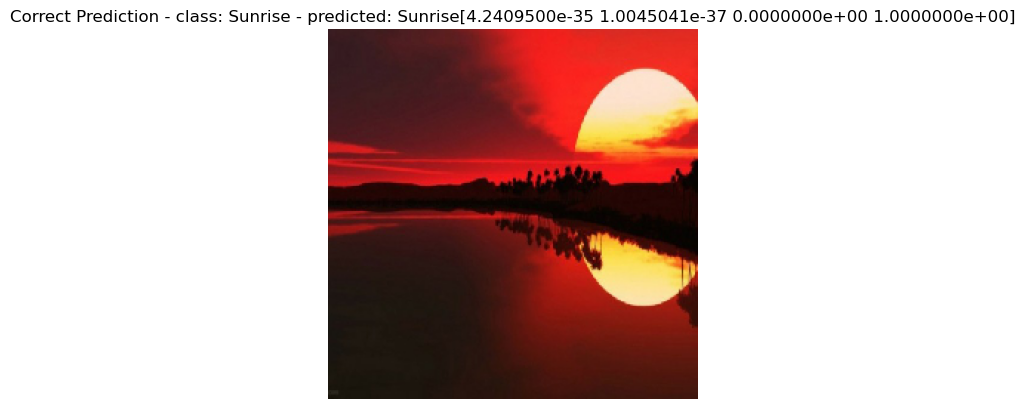

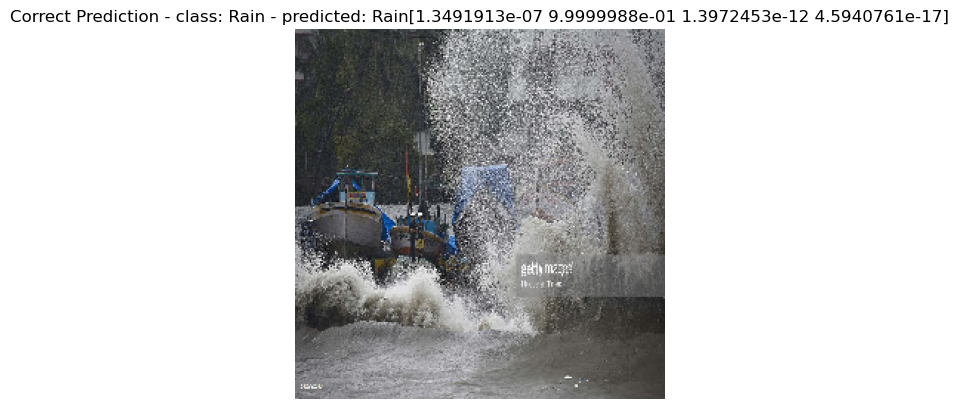

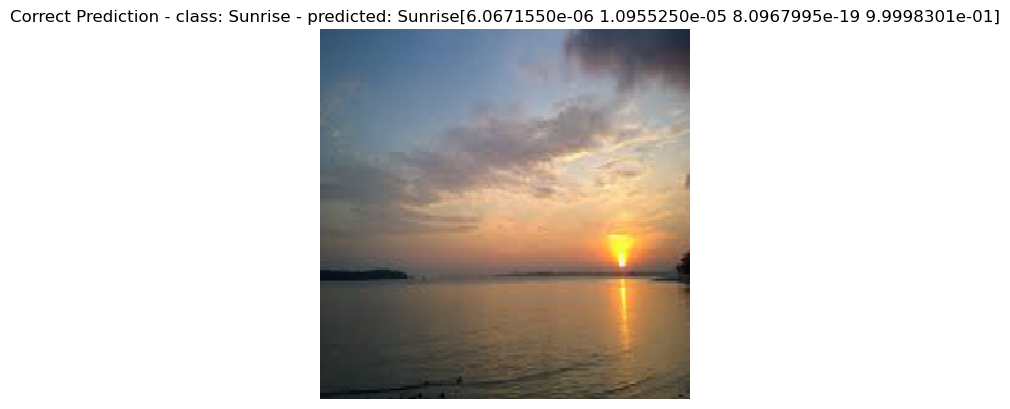

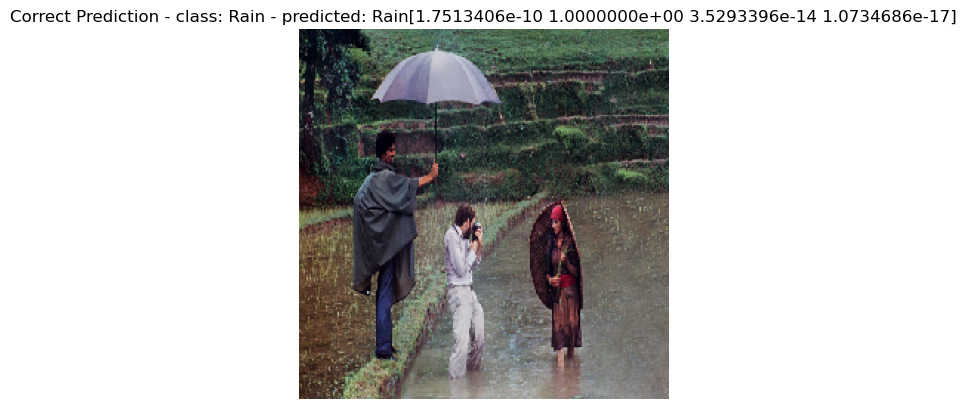

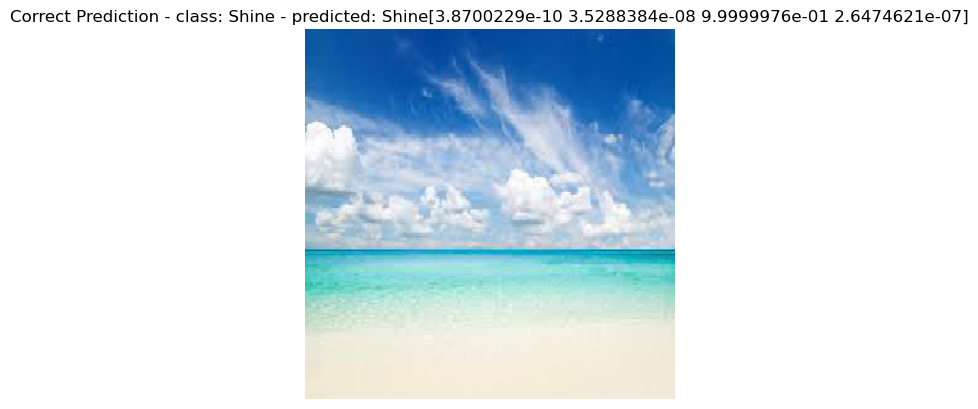

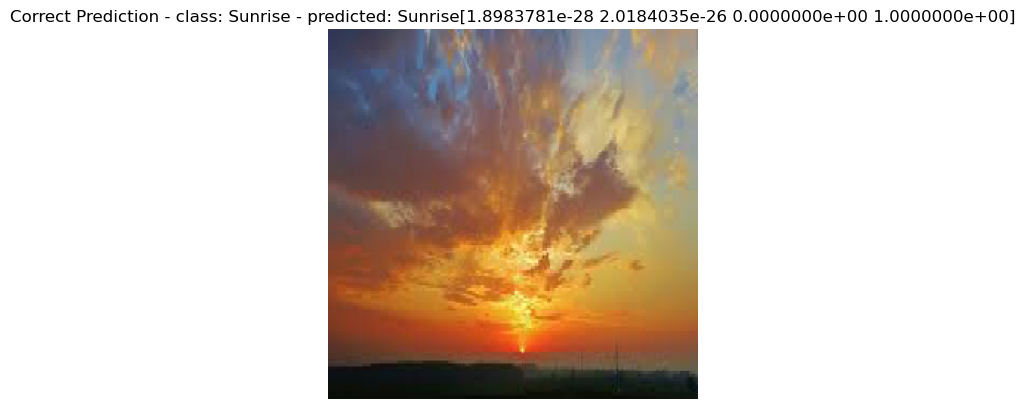

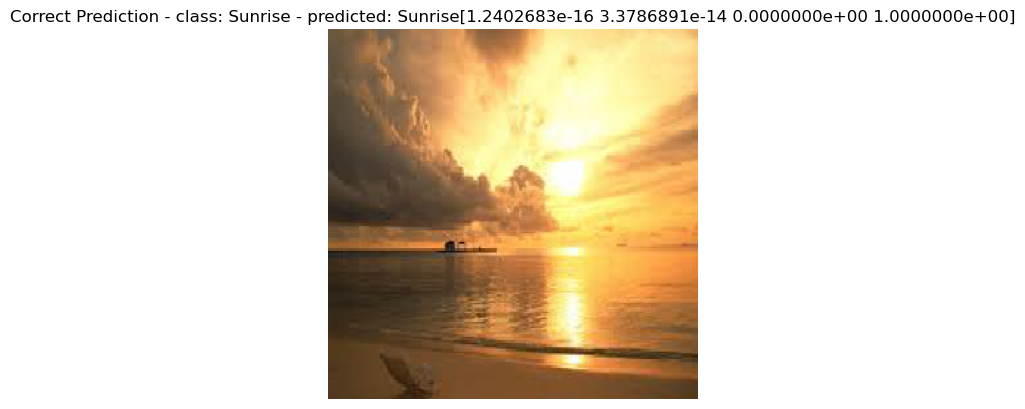

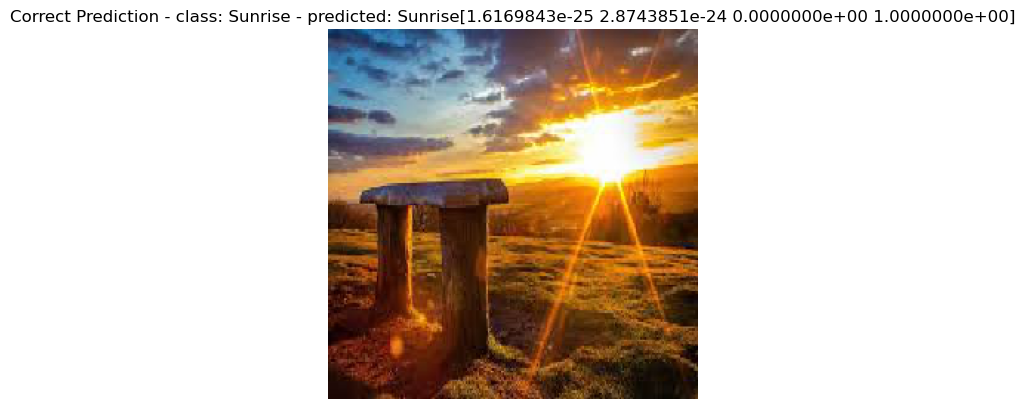

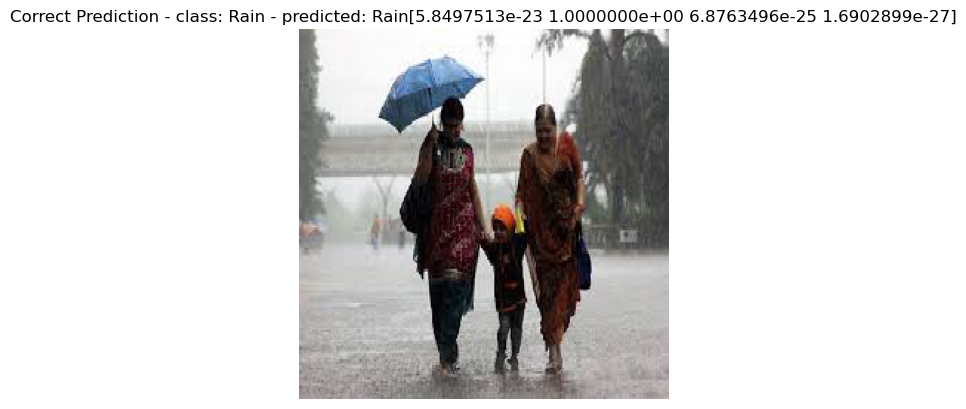

In [178]:
predict_one(model, 10) #<--you can show multiple pictures with this command. Just fill in the number you want to see.